# Regularized Linear Models

CSC/DSC Week 3 Lecture Notes

Author: Dr. Julie Butler

Date Created: August 10, 2023

Last Modified: August 10, 2023

## Introduction to Regularized Linear Models

Regularized linear models, like linear regression, can only model linear patterns in data unless they are modified using a design matrix. However, the purpose of regularizing a model is to improve its fitting abilities. In the context of machine learning, the word regularized means constrained. We constrain our models to avoid overfitting. If a model is overfitted, then it can very accurately recreate the training data, but it will perform poorly on new data (the test data set). You can determine if a model is overfit by asking it to predict the values of both the test data set and the training data set. If the error on the training set predictions are significantly lower than the error on the test data, then the model is likely overfit.  Overfitting is not as big of a problem with simple models, but it becomes a huge concern when we move to more complicated models like neural networks, so we should learn how to deal with it early. 

Regularizing a linear model is usually achieved by constraining the weights (parameters) of the model. This is achieved by adding a _regularization term_ the the MSE loss function. We will look at two regularized linear models in this course--LASSO and ridge--but there are others such as elastic net that you can read about in the textbook and online.  The benefits of using regularized linear models of plain linear regression are automatic feature selection (the models decide which features in the input data are the most important) and a greater ability to resist outliers.

Also, it is important to note that regularized models, including ridge and LASSO regression, are sensitive to the scale of the input data, and thus it is a good practice to scale the data before training the models. A common way to scale the input data is using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function from Scikit-Learn, where each input value, x, is transformed to a scaled input value, z, using this formula:

$$z = \frac{x-\mu}{\sigma},$$

where $\mu$ is the mean of the input data and $\sigma$ is the standard deviation of the input data. By scaling the data we are ensuring that all of the input values are roughly the same size which uincreases the accuracy of the regularized models.


## Ridge Regression

The first regularized linear model we will look at is called ridge regresion (also known as Tikhonov regularization or L2 regularization). If we consider the loss function of regular linear regression (the MSE):

$$J_{Linear}(\theta) = \frac{1}{N}\sum_{i=0}^N (\hat{y}_i - \vec{y}_i)^2,$$

then the ridge regression loss function is the same MSE function, but it has an additional regularization term at the end:

$$J_{Ridge}(\theta) = \frac{1}{N}\sum_{i=0}^N (\hat{y}_i - \vec{y}_i)^2 + \frac{\alpha}{2}\sum_{i=1}^m\theta_i^2.$$

This added term, the L2 norm of the weights, not only forces the ridge regression algorithm to fit the data, but also to do so in a way that keeps the weights as small as possible (large weigths would make the regularization term high and result in a high loss function value).  The value $\alpha$ is a hyperparameter known as the strength of the regularization and it controls how regularized the loss function is. If $\alpha$ is very large then the ridge regression model will fit a horizontal line that goes through the data's mean value. If $\alpha$ is very small then the model is only slightly regularized, and if $\alpha$ = 0 the ridge regression model reverts to linear regression because the regularization term on the loss function vanishes. Since $\alpha$ is a hyperparameter, this means that the user has to set its value before the algorithm is run. The value chosen can drastically effect the results of the model, it is important to find a good value. The process of finding the best values for any hyperparameters is called hyperparameter tuning and this topic will be explored later in these lecture notes.  Note that in some resources, instead of writing the coefficient of the regularization term as $\frac{\alpha}{2}$, it can sometimes be written as just $\alpha$, and sometimes $\lambda$ is used instead of $\alpha$.  There is no standard notation but all of the terms function the same.

Another important thing to note is that the regularization sum starts from i = 1 instead of i = 0, meaning that the first value in the weights vector is not regularized. This first weight, $\theta_0$ is called the bias term and we want to keep some bias in our model to lead to better generalization (read in the textbook or online about bias-variance trade-off if you are interested in learning more about this).

Much like linear regression, ridge regression as a closed-form solution for its optimized parameters:

$$\theta = (\textbf{X}^T\textbf{X} + \alpha\textbf{I})^{-1}\textbf{X}^Ty,$$

where $\textbf{I}$ is the identity matrix. Note that this differs from the linear regression equation only by the $\alpha\textbf{I}$ term.

## LASSO Regression
Least Absolute Shrinkage and Selection Operator Regression (lasso, LASSO, or L1 regression) is a another regularized linear model, but instead of modifying the loss function by the L2 norm of the parameters, it modifies it by the L1 norm.

$$J_{Ridge}(\theta) = \frac{1}{N}\sum_{i=0}^N (\hat{y}_i - \vec{y}_i)^2 + \frac{\alpha}{2}\sum_{i=1}^m|\theta_i|$$

Note that just like for ridge regression, $\theta_0$ is not regularized and $\alpha$ is a hyperparamter. An important result of the LASSO regression loss function is that it will eliminate any features that are of the least importance (i.e. do not strongly correlate with the output). This is a form of feature selection where LASSO regression will only leave the weights that correspond to the most important features non-zero. Linear and ridge regression also do this to some extent, but they are unlikely to force the weights associated with unimportant features to zero. However, they will make these weights quite small so the effects of the important features is larger.

LASSO regression does not have a closed form solution for its optimized parameters so it is optimized using an iterative optimizer such as gradient descent. Optimization is a huge subfield within machine learning that is very mathematics heavy and of interest to those who work with very large machine learning models.

## Linear Model Comparison

In the following section we will compare the performance of linear regression, ridge regression, and LASSO regression on analyzing the diabetes data set used in the Week 2 Slides.

### Initial Data Analysis

First we need to import the data set and perform an initial data analysis to determine what patterns we want to learn with machine learning.

In [1]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

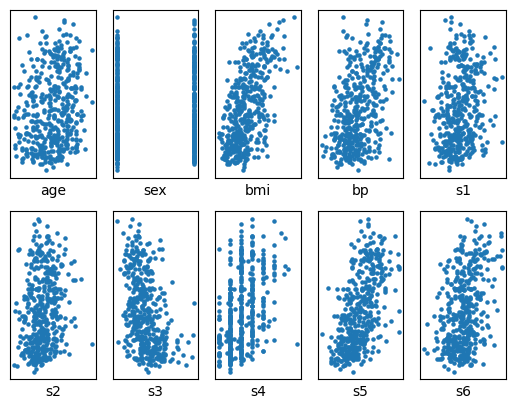

In [2]:
# Load the diabetes dataset in a better format for machine learning
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Plot each of the features against the target values
fig, axs = plt.subplots(2,5)
k = 0
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(diabetes_X[:,k], diabetes_y, s=5)
        axs[i][j].set_xlabel(datasets.load_diabetes().feature_names[k])
        k += 1
        axs[i][j].set_yticks(())
        axs[i][j].set_xticks(())

In our previous analysis we selected only two of the 10 features (a manual feature selection) but in this test we want to use all of the featues (except for sex) to see if the models can decide which features are the most important (automatic feature selection).

In [3]:
# Remove sex as a feature of interest
diabetes_X = np.delete(diabetes_X, 1, 1)

### Scaling the Data with StardardScalar

In this section we will scale our data using the StandardScaler from Scikit-Learn. In the first code cell we fit the scaler using our X data set and then we transform our X data using the fit scalar. In the second code cell we test a couple values to make sure the Z data set is different from the X data set.

In [4]:
# Define the scaler
scaler = StandardScaler()
# Fit the scaler
scaler.fit(diabetes_X)
# Transform the x data with the fit scaler
diabetes_Z = scaler.transform(diabetes_X)

In [5]:
# Test to make sure the Z data set is different from the X data set
print(diabetes_X[0][0], diabetes_Z[0][0])
print(diabetes_X[3][2], diabetes_Z[3][2])
print(diabetes_X[-1][-1], diabetes_Z[-1][-1])

0.038075906433423026 0.8005000909564217
-0.03665608107540074 -0.7706499722146275
0.0030644094143684884 0.06442551851572943


### Train-Test Split

Now, in preparation for the machine learning, we will split the data into training and test data sets, using 20% of the data for the test set.

In [6]:
Z_train, Z_test, y_train, y_test = train_test_split(diabetes_Z, diabetes_y, test_size=0.2)

### Training and Predicting

Now we will train and predict the test set using the three different linear models, saving the predictions for analysis in the next section.

In [7]:
linear_regression = LinearRegression()
linear_regression.fit(Z_train, y_train)
y_pred_linear = linear_regression.predict(Z_test)

In [8]:
ridge_regression = Ridge()
ridge_regression.fit(Z_train, y_train)
y_pred_ridge = ridge_regression.predict(Z_test)

In [9]:
lasso_regression = Lasso()
lasso_regression.fit(Z_train, y_train)
y_pred_lasso = lasso_regression.predict(Z_test)

### Results Analysis

Now we want to compare and see how the models performed. First we will compare the MSE score for each of the model predictions compared to the test data set.

In [10]:
print("Linear MSE:", mean_squared_error(y_test, y_pred_linear))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("LASSO MSE:", mean_squared_error(y_test, y_pred_lasso))

Linear MSE: 2701.010242078616
Ridge MSE: 2693.0589938974217
LASSO MSE: 2684.7193074836036


Though the models have similar, but different, MSE scores, it appears that linear regression performed the best, closely followed by ridge regression, and LASSO regression performed the worst. Now let's graphically compare the results. Note that linear regression (orange) is plotted though in most cases its points are hidden by the ridge regression points.

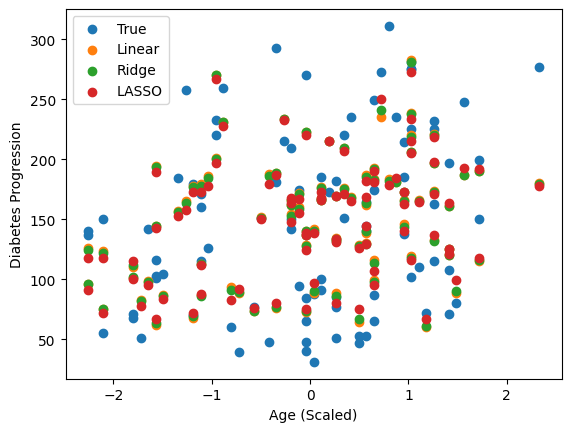

In [11]:
plt.scatter(Z_test[:,0], y_test, label="True")
plt.scatter(Z_test[:,0], y_pred_linear, label="Linear")
plt.scatter(Z_test[:,0], y_pred_ridge, label="Ridge")
plt.scatter(Z_test[:,0], y_pred_lasso, label="LASSO")
plt.xlabel("Age (Scaled)")
plt.ylabel("Diabetes Progression")
plt.legend()

Finally, let's compare the trained parameters for each of the models.  I have printed out the names of each of the parameters (with the long names given in the Week 2 slides) and then the coefficients for each of the models. For linear regression, it choose the log of the serum triglycerides (s5), the body mass index (bmi), and total serum cholestrol (s1) as the features that have the highest correlation to diabetes progression, but all of the features contribute somewhat to the final result. Ridge regression chose the same features as having the highest correlation but because it is regularized it is able to decrease the weights on some of the less important features. LASSO regression actually has different slightly different results with BMI and S5 being the most important features, blood pressure (BP) has a similar weight to the other models, but LASSO does not rank S1 highly which the other models did. And we can see with LASSO regression that it as able to force some of its features to zero.

In [12]:
print("Age, BMI, BP, S1, S2, S3, S4, S5, S6")
print("Linear")
print(linear_regression.coef_)
print("Ridge")
print(ridge_regression.coef_)
print("LASSO")
print(lasso_regression.coef_)

Age, BMI, BP, S1, S2, S3, S4, S5, S6
Linear
[ -3.02872914  25.83800076  12.54022321 -39.17278025  24.420767
  10.99855992   6.82206182  37.58314075   5.40933297]
Ridge
[ -2.95194181  25.89043613  12.50519564 -29.63424677  16.97498477
   6.61405732   5.54809574  33.89255518   5.48735837]
LASSO
[-1.31439499 25.81828162 11.48529715 -5.13006006 -0.         -5.15771672
  0.         24.72723819  4.97334052]


## Hyperparameter Tuning

Both ridge regression and LASSO regression have a hyperparameter, $\alpha$, whose value must be set before the algorithm can be used. The Scikit-Learn implementations of these algorithms set a default value for $\alpha$, but since the value of $\alpha$ effects the results of our algorithm, the default value may not be the best option. Instead, we will do something called hyperparameter tuning where we test many different values of $\alpha$ so see which ones gives us the best error. We can test a few different values using a for loop and a print statement:

In [13]:
for alpha in [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2]:
    ridge_regression = Ridge(alpha = alpha)
    ridge_regression.fit(Z_train, y_train)
    y_pred_ridge = ridge_regression.predict(Z_test)
    print(alpha, mean_squared_error(y_test, y_pred_ridge))

1e-10 2701.010242077347
1e-08 2701.0102419517357
1e-06 2701.0102293907885
0.0001 2701.008973363918
0.01 2700.8840463022084
1.0 2693.0589938974217
100.0 2800.5659590358687


While this method works if we are only testing a few values, it is hard to find the lowest error if we are testing many values. Instead, a better way to do this is to store the current lowest error and the corresponding $\alpha$ value and compare every time we compute a new error.

In [14]:
# Initialize the variable to store the best error to a very high number and the variable
# to store the best value of alpha to None
best_err = 1e10
best_alpha = None
# Values of alpha to loop through
for alpha in [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2]:
    # Train and predict a ridge regression algorithm with the current value of alpha
    ridge_regression = Ridge(alpha = alpha)
    ridge_regression.fit(Z_train, y_train)
    y_pred_ridge = ridge_regression.predict(Z_test)
    # Compute the MSE of the current prediction
    err =  mean_squared_error(y_test, y_pred_ridge)
    # If the current MSE is lower than the best error, store the new error and alpha value
    if err < best_err:
        best_err = err
        best_alpha = alpha

# Print the overall best results
print("Best Alpha:", best_alpha)
print("Best Error:", best_err)

Best Alpha: 1.0
Best Error: 2693.0589938974217


Using this method we can easily test 1,000 different values for $\alpha$ to find the best value.  While we are looping through all the different alpha values, we can also store the errors for each alpha value to create a plot of MSE vs. $\alpah$ to determine if there are any patterns in the data. Here we use the `np.logspace(a, b, c)` function, which creates c points that are evenly space (on a log-scale) between $10^a$ and $10^b$.

Best Alpha: 3.8689007393279833
Best Error: 2688.5888179740246


Text(0, 0.5, 'MSE')

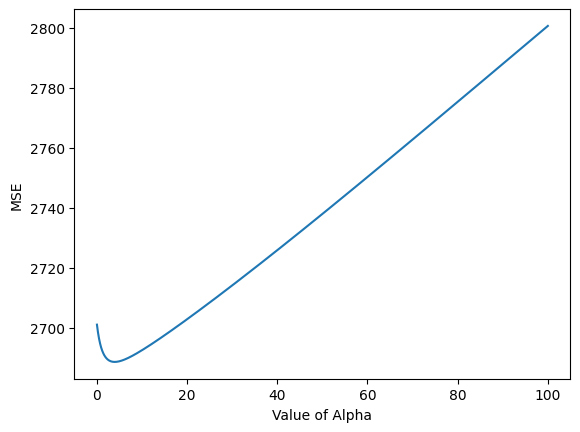

In [15]:
# Initialize the variable to store the best error to a very high number and the variable
# to store the best value of alpha to None
best_err = 10000
best_alpha = None

# Create an empty list to store the error for each iteration
errs = []
# Values of alpha to loop through
for alpha in np.logspace(-15,2,1000):
    # Train and predict a ridge regression algorithm with the current value of alpha
    ridge_regression = Ridge(alpha = alpha)
    ridge_regression.fit(Z_train, y_train)
    y_pred_ridge = ridge_regression.predict(Z_test)
    # Compute the MSE of the current prediction and store it    
    err =  mean_squared_error(y_test, y_pred_ridge)
    errs.append(err)
    # If the current MSE is lower than the best error, store the new error and alpha value    
    if err < best_err:
        best_err = err
        best_alpha = alpha

# Print the overall best results
print("Best Alpha:", best_alpha)
print("Best Error:", best_err)

# Plot MSE as a function of alpha
plt.plot(np.logspace(-15,2,1000), errs)
plt.xlabel("Value of Alpha")
plt.ylabel("MSE")

Based on both the best value of $\alpha$ and the plot, it appears that the most accurate predictions for this data set are made with a small amount of regularization, though this will not be the case with all data sets.  We can peform the same hyperparameter tuning with LASSO regression and we also find that the best value of $\alpha$ is very low.  Note that for LASSO, when $\alpha$ is very large the MSE error diverges and becomes very large.  This is because the iterative optimization algorithm was not able to coverge the optimization of the parameters, which can occur when values (like $\alpha$ and the weights) become too large.

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.368e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.367e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.367e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.364e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.364e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.350e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.349e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.291e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.288e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.050e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.038e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.189e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.150e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.198e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+05, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.648e+04, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.396e+04, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.262e+03, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.968e+03, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.702e+02, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+02, tolerance: 2.131e+02
  model = cd_fast.enet_coordinate_descent(
/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Best Alpha: 0.14393226447194093
Best Error: 2680.196271116621


Text(0, 0.5, 'MSE')

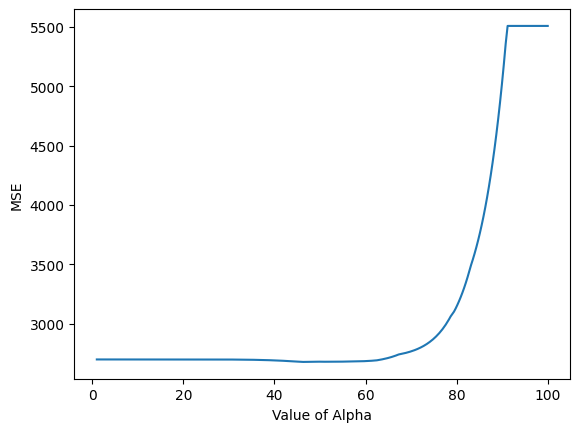

In [16]:
best_err = 10000
best_alpha = None
errs = []
for alpha in np.logspace(-15,2,1000):
    lasso_regression = Lasso(alpha = alpha)
    lasso_regression.fit(Z_train, y_train)
    y_pred_lasso = lasso_regression.predict(Z_test)
    err =  mean_squared_error(y_test, y_pred_lasso)
    errs.append(err)
    if err < best_err:
        best_err = err
        best_alpha = alpha
print("Best Alpha:", best_alpha)
print("Best Error:", best_err)
plt.plot(np.logspace(0,2,1000), errs)
plt.xlabel("Value of Alpha")
plt.ylabel("MSE")

Though we only have one hyperparameter here, were are able to see that its value does effect the predictions, and can do so to a signficant degree.  In Week 5 of this course when we learn about kernel ridge regression and in Week 7 when we start learning about neural networks, we will have 5-20 possible hyperparameters per algorithm, so hyperparameter tuning becomes much more complicated but also much more important. As we advance in this course we will learn different ways to determine the best values of hyperparameters, especially for very complicated models like neural networks.